In [163]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [164]:
df = pd.read_csv('bank-full.csv')
df = df.drop(columns=['balance','contact','day','month','duration','campaign','pdays','previous','poutcome'])
df

,age,job,marital,education,default,housing,loan,y
0,58,management,married,tertiary,no,yes,no,no
1,44,technician,single,secondary,no,yes,no,no
2,33,entrepreneur,married,secondary,no,yes,yes,no
3,47,blue-collar,married,unknown,no,yes,no,no
4,33,unknown,single,unknown,no,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,no,yes
45207,71,retired,divorced,primary,no,no,no,yes
45208,72,retired,married,secondary,no,no,no,yes
45209,57,blue-collar,married,secondary,no,no,no,no


In [165]:
cols = df.job #算出job裡面unknown的數量
i = 0
for col in cols:
    if col == 'unknown':
        i=i+1
print(i)



288


In [166]:
cols2 = df.education #算出job裡面unknown的數量
i = 0
for col in cols2:
    if col == 'unknown':
        i=i+1
print(i)


1857


In [167]:
cols = df.job #算出job裡面unknown的數量
i = 0
for col in cols:
    if col == 'unknown':
        i=i+1
print(i)

288


In [168]:
df=df[ ~ df['job'].str.contains('unknown') ]
df=df[ ~ df['education'].str.contains('unknown') ]

In [169]:
df.reset_index(drop=True, inplace=True) #重新排序
df

,age,job,marital,education,default,housing,loan,y
0,58,management,married,tertiary,no,yes,no,no
1,44,technician,single,secondary,no,yes,no,no
2,33,entrepreneur,married,secondary,no,yes,yes,no
3,35,management,married,tertiary,no,yes,no,no
4,28,management,single,tertiary,no,yes,yes,no
...,...,...,...,...,...,...,...,...
43188,51,technician,married,tertiary,no,no,no,yes
43189,71,retired,divorced,primary,no,no,no,yes
43190,72,retired,married,secondary,no,no,no,yes
43191,57,blue-collar,married,secondary,no,no,no,no


<Figure size 5000x3000 with 0 Axes>

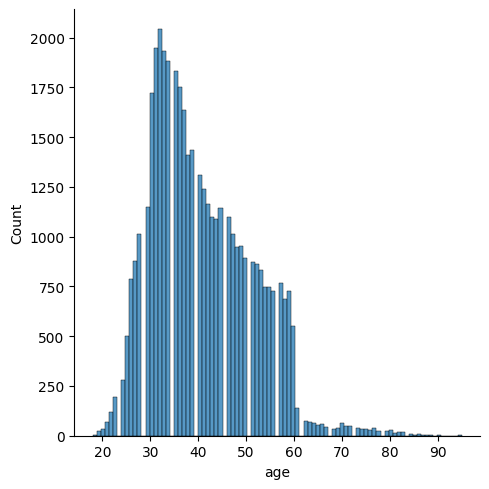

In [170]:
plt.figure(figsize=(50,30))  #連續型屬性數據圖像化
sns.displot(df['age'])
plt.show()

In [171]:
ageList = df['age'].tolist()  #將年齡分成三個區間
bins = [18,30,60,95]
age_cut = pd.cut(ageList, bins, labels=['young_adult', 'middle_age', 'senior'])
df['age'] = age_cut

In [172]:
ageMapping = {
              'young_adult': 3,
              'middle_age': 2,
              'senior': 1
}
df['age'] = df['age'].map(ageMapping)

In [173]:
pd.get_dummies(df['job'])
onehot_encoding_job = pd.get_dummies(df['job'], prefix = 'job')
df.drop

<bound method DataFrame.drop of       age           job   marital  education default housing loan    y
0       2    management   married   tertiary      no     yes   no   no
1       2    technician    single  secondary      no     yes   no   no
2       2  entrepreneur   married  secondary      no     yes  yes   no
3       2    management   married   tertiary      no     yes   no   no
4       3    management    single   tertiary      no     yes  yes   no
...    ..           ...       ...        ...     ...     ...  ...  ...
43188   2    technician   married   tertiary      no      no   no  yes
43189   1       retired  divorced    primary      no      no   no  yes
43190   1       retired   married  secondary      no      no   no  yes
43191   2   blue-collar   married  secondary      no      no   no   no
43192   2  entrepreneur   married  secondary      no      no   no   no

[43193 rows x 8 columns]>

In [174]:

df = pd.concat([onehot_encoding_job, df], axis=1)

In [175]:
pd.get_dummies(df['marital'])
onehot_encoding_marital = pd.get_dummies(df['marital'], prefix = 'marital')

In [176]:
df = pd.concat([onehot_encoding_marital, df], axis=1)

In [177]:
educationMapping = {            
              'primary':1,
              'secondary':2,
              'tertiary':3
}
df['education'] = df['education'].map(educationMapping)


In [178]:
defaultMapping = {            
              'no':0,
              'yes':1
}
df['default'] = df['default'].map(defaultMapping)
df

,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,age,job,marital,education,default,housing,loan,y
0,0,1,0,0,0,0,0,1,0,0,...,0,0,2,management,married,3,0,yes,no,no
1,0,0,1,0,0,0,0,0,0,0,...,1,0,2,technician,single,2,0,yes,no,no
2,0,1,0,0,0,1,0,0,0,0,...,0,0,2,entrepreneur,married,2,0,yes,yes,no
3,0,1,0,0,0,0,0,1,0,0,...,0,0,2,management,married,3,0,yes,no,no
4,0,0,1,0,0,0,0,1,0,0,...,0,0,3,management,single,3,0,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,0,1,0,0,0,0,0,0,0,0,...,1,0,2,technician,married,3,0,no,no,yes
43189,1,0,0,0,0,0,0,0,1,0,...,0,0,1,retired,divorced,1,0,no,no,yes
43190,0,1,0,0,0,0,0,0,1,0,...,0,0,1,retired,married,2,0,no,no,yes
43191,0,1,0,0,1,0,0,0,0,0,...,0,0,2,blue-collar,married,2,0,no,no,no


In [179]:
defaultloan = {            
              'no':0,
              'yes':1
}
df['loan'] = df['loan'].map(defaultloan)

In [180]:
defaulthousing = {            
              'no':0,
              'yes':1
}
df['housing'] = df['housing'].map(defaulthousing)

In [181]:
defaulty = {            
              'no':0,
              'yes':1
}
df['y'] = df['y'].map(defaulty)

In [182]:
df

,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,age,job,marital,education,default,housing,loan,y
0,0,1,0,0,0,0,0,1,0,0,...,0,0,2,management,married,3,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,2,technician,single,2,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,2,entrepreneur,married,2,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,2,management,married,3,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,3,management,single,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,0,1,0,0,0,0,0,0,0,0,...,1,0,2,technician,married,3,0,0,0,1
43189,1,0,0,0,0,0,0,0,1,0,...,0,0,1,retired,divorced,1,0,0,0,1
43190,0,1,0,0,0,0,0,0,1,0,...,0,0,1,retired,married,2,0,0,0,1
43191,0,1,0,0,1,0,0,0,0,0,...,0,0,2,blue-collar,married,2,0,0,0,0


In [183]:
df = df.drop(columns=['job','marital'])

In [184]:
df

,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,age,education,default,housing,loan,y
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,3,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,2,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,3,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,3,0,0,0,1
43189,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
43190,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,1
43191,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0


In [185]:
df1=df['y']
xlable=df.drop(['y'],axis=1)

In [186]:
x=xlable
y=df1
print(x)

       marital_divorced  marital_married  marital_single  job_admin.  \
0                     0                1               0           0   
1                     0                0               1           0   
2                     0                1               0           0   
3                     0                1               0           0   
4                     0                0               1           0   
...                 ...              ...             ...         ...   
43188                 0                1               0           0   
43189                 1                0               0           0   
43190                 0                1               0           0   
43191                 0                1               0           0   
43192                 0                1               0           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                    0                 0              0     

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(30235, 19) (30235,) (12958, 19) (12958,)


In [188]:
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth= 9,ccp_alpha=0.0001  ).fit(x_train,y_train)

In [189]:
predictions = clf.predict(x_test)

In [190]:
clf.get_params()


{'ccp_alpha': 0.0001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [191]:
feature_df = x
feature_names = feature_df.columns

<AxesSubplot:>

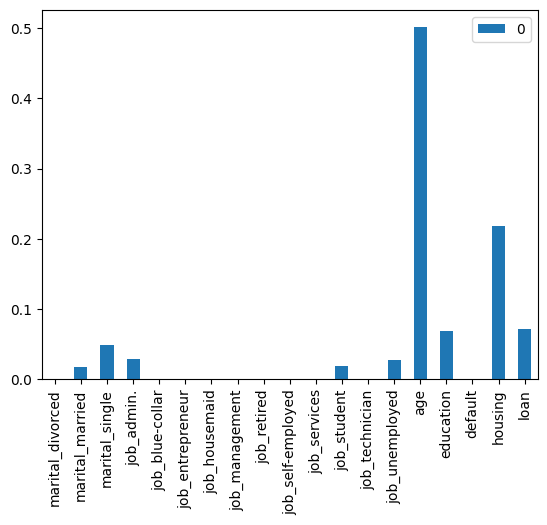

In [192]:
feature_importance = pd.DataFrame(clf.feature_importances_,index = feature_names)
feature_importance.plot(kind='bar')

In [193]:
clf.score(x_train,y_train)

0.8832148172647594

In [194]:
clf.score(x_test,y_test)

0.8841642228739003

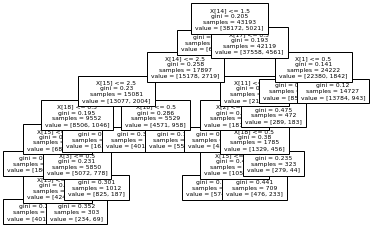

In [33]:
clf.fit(x,y)
plt.figsize=(12,12)
tree.plot_tree(clf, fontsize=6)
plt.show()


In [195]:
y_test

34561    0
23389    0
41926    1
22844    0
5208     0
        ..
11266    0
6556     0
21416    0
42928    1
5709     0
Name: y, Length: 12958, dtype: int64

In [196]:
answer = y_test.values

clf_prediction = []
for j in predictions:
    clf_prediction.append('%d' % j)
    
predictions = list(predictions)
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [197]:
y_answer = pd.Series(answer, name='answer')
y_prediction = pd.Series(clf_prediction, name='predict')

result = pd.DataFrame(y_answer).join(y_prediction)

test_result = 'bank.test_result.xlsx'
  
#匯入excel
result.to_excel(test_result)